In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import lightgbm as lgb
from lightgbm import LGBMRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [3]:
# Load Dataset
df = pd.read_csv('/kaggle/input/parkinsons-dataset/parkinsons_disease_data.csv') 

In [4]:
# Show first 5 
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis,DoctorInCharge
0,3058,85,0,3,1,19.619878,0,5.108241,1.380660,3.893969,...,1.572427,1,0,0,0,0,0,0,0,DrXXXConfid
1,3059,75,0,0,2,16.247339,1,6.027648,8.409804,8.513428,...,4.787551,0,1,0,1,0,1,0,1,DrXXXConfid
2,3060,70,1,0,0,15.368239,0,2.242135,0.213275,6.498805,...,2.130686,1,0,0,0,1,0,1,1,DrXXXConfid
3,3061,52,0,0,0,15.454557,0,5.997788,1.375045,6.715033,...,3.391288,1,1,1,0,0,0,1,1,DrXXXConfid
4,3062,87,0,0,1,18.616042,0,9.775243,1.188607,4.657572,...,3.200969,0,0,0,1,0,1,0,0,DrXXXConfid


In [5]:
# Showcasing the datatypes of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105 entries, 0 to 2104
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PatientID                 2105 non-null   int64  
 1   Age                       2105 non-null   int64  
 2   Gender                    2105 non-null   int64  
 3   Ethnicity                 2105 non-null   int64  
 4   EducationLevel            2105 non-null   int64  
 5   BMI                       2105 non-null   float64
 6   Smoking                   2105 non-null   int64  
 7   AlcoholConsumption        2105 non-null   float64
 8   PhysicalActivity          2105 non-null   float64
 9   DietQuality               2105 non-null   float64
 10  SleepQuality              2105 non-null   float64
 11  FamilyHistoryParkinsons   2105 non-null   int64  
 12  TraumaticBrainInjury      2105 non-null   int64  
 13  Hypertension              2105 non-null   int64  
 14  Diabetes

In [6]:
# Describe the dataset
df.describe()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MoCA,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis
count,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,...,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000
mean,4110.000000,69.601900,0.492637,0.692637,1.337292,27.209493,0.296437,10.040413,5.016674,4.912901,...,15.094314,4.989694,0.431829,0.252732,0.207601,0.138717,0.295012,0.245131,0.296912,0.619477
std,607.805479,11.594511,0.500065,1.003827,0.895840,7.208099,0.456795,5.687014,2.890919,2.872115,...,8.643014,2.933877,0.495449,0.434682,0.405686,0.345733,0.456156,0.430267,0.457006,0.485631
min,3058.000000,50.000000,0.000000,0.000000,0.000000,15.008333,0.000000,0.002228,0.004157,0.000011,...,0.021191,0.001505,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3584.000000,60.000000,0.000000,0.000000,1.000000,20.782176,0.000000,5.150278,2.455703,2.478503,...,7.517160,2.415890,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4110.000000,70.000000,0.000000,0.000000,1.000000,27.184571,0.000000,10.070337,5.031550,4.825187,...,14.963574,4.983227,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,4636.000000,80.000000,1.000000,1.000000,2.000000,33.462452,1.000000,14.829565,7.512795,7.381487,...,22.608362,7.484220,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,5162.000000,89.000000,1.000000,3.000000,3.000000,39.999887,1.000000,19.988866,9.995255,9.995864,...,29.970107,9.992697,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

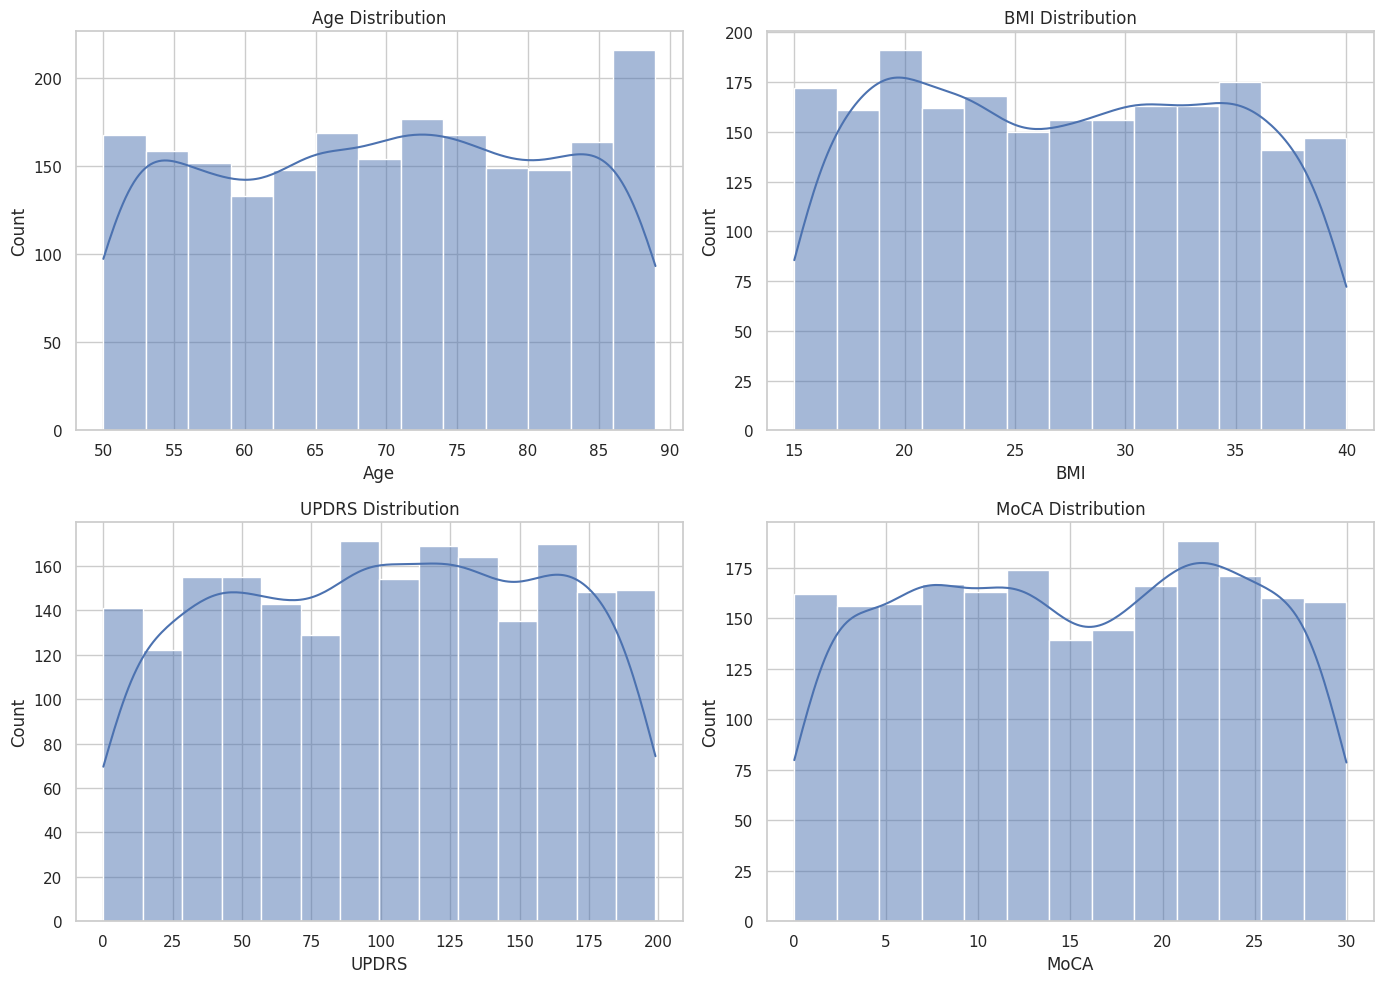

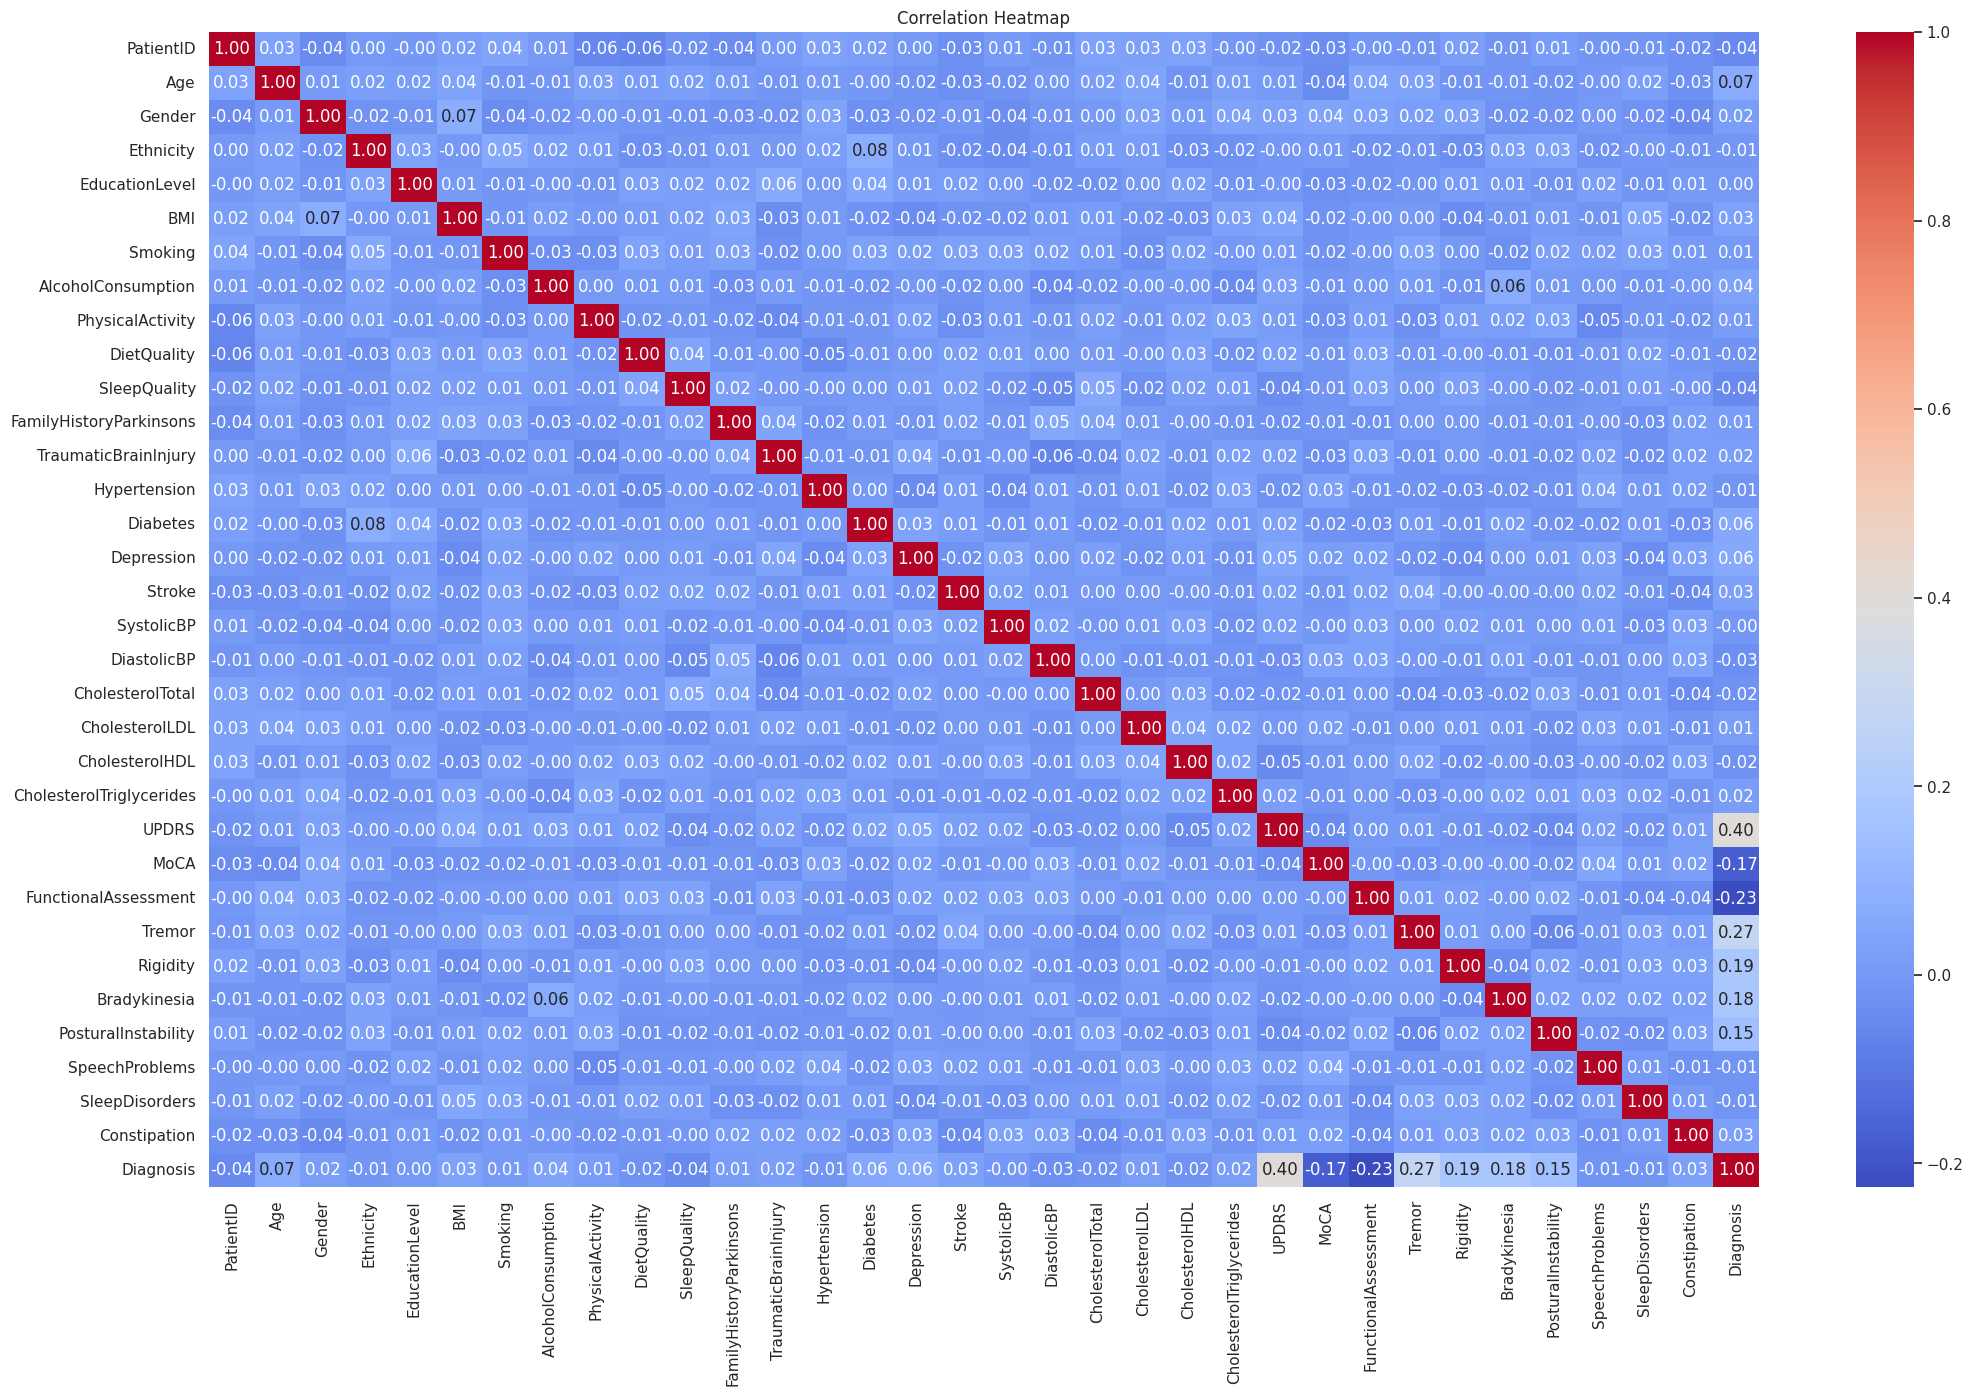

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

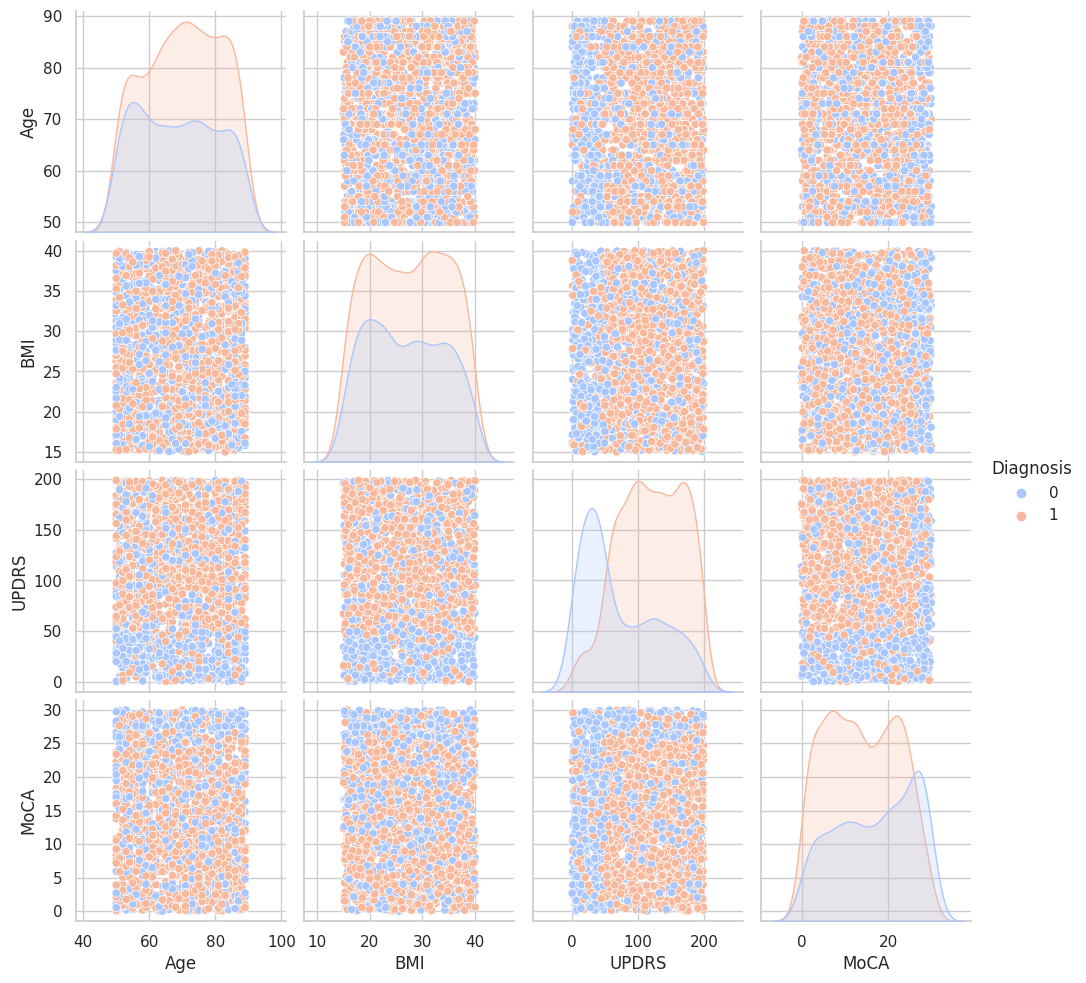

In [11]:
# Setting the aesthetics for the plots
sns.set(style="whitegrid")

# Plotting the distribution of Age, BMI, UPDRS, and MoCA
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Age distribution
sns.histplot(df['Age'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')

# BMI distribution
sns.histplot(df['BMI'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('BMI Distribution')

# UPDRS distribution
sns.histplot(df['UPDRS'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('UPDRS Distribution')

# MoCA distribution
sns.histplot(df['MoCA'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title('MoCA Distribution')

plt.tight_layout()
plt.show()

# Check for non-numeric columns
non_numeric_columns = df.select_dtypes(exclude=['float64', 'int64']).columns

# Drop non-numeric columns from correlation calculation
numeric_df = df.drop(columns=non_numeric_columns)

# Correlation heatmap
plt.figure(figsize=(25, 15))
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Pairplot for selected features
selected_features = ['Age', 'BMI', 'UPDRS', 'MoCA', 'Diagnosis']
sns.pairplot(df[selected_features], hue='Diagnosis', palette='coolwarm')
plt.show()

# #**Diagnosis**

In [34]:
# Prepare the data
X = df.drop(['Diagnosis', 'PatientID', 'DoctorInCharge'], axis=1)
y = df['Diagnosis']

In [35]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [36]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
# Models load 
log_reg = LogisticRegression()
random_forest = RandomForestClassifier()
svm = SVC(probability=True) 
xgboost = XGBClassifier()
catboost = CatBoostClassifier(verbose=0)

In [38]:
# Train and evaluate Logistic Regression
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
y_proba_log_reg = log_reg.predict_proba(X_test)[:, 1]
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
precision_log_reg = precision_score(y_test, y_pred_log_reg)
recall_log_reg = recall_score(y_test, y_pred_log_reg)
f1_log_reg = f1_score(y_test, y_pred_log_reg)
roc_auc_log_reg = roc_auc_score(y_test, y_proba_log_reg)

In [39]:
# Train and evaluate Random Forest
random_forest.fit(X_train, y_train)
y_pred_random_forest = random_forest.predict(X_test)
y_proba_random_forest = random_forest.predict_proba(X_test)[:, 1]
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
precision_random_forest = precision_score(y_test, y_pred_random_forest)
recall_random_forest = recall_score(y_test, y_pred_random_forest)
f1_random_forest = f1_score(y_test, y_pred_random_forest)
roc_auc_random_forest = roc_auc_score(y_test, y_proba_random_forest)


In [40]:
# Train and evaluate SVM
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
y_proba_svm = svm.predict_proba(X_test)[:, 1]  # Use probabilities
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
roc_auc_svm = roc_auc_score(y_test, y_proba_svm)

In [41]:
# Train and evaluate XGBoost
xgboost.fit(X_train, y_train)
y_pred_xgboost = xgboost.predict(X_test)
y_proba_xgboost = xgboost.predict_proba(X_test)[:, 1]
accuracy_xgboost = accuracy_score(y_test, y_pred_xgboost)
precision_xgboost = precision_score(y_test, y_pred_xgboost)
recall_xgboost = recall_score(y_test, y_pred_xgboost)
f1_xgboost = f1_score(y_test, y_pred_xgboost)
roc_auc_xgboost = roc_auc_score(y_test, y_proba_xgboost)

In [42]:
# Train and evaluate CatBoost
catboost.fit(X_train, y_train)
y_pred_catboost = catboost.predict(X_test)
y_proba_catboost = catboost.predict_proba(X_test)[:, 1]
accuracy_catboost = accuracy_score(y_test, y_pred_catboost)
precision_catboost = precision_score(y_test, y_pred_catboost)
recall_catboost = recall_score(y_test, y_pred_catboost)
f1_catboost = f1_score(y_test, y_pred_catboost)
roc_auc_catboost = roc_auc_score(y_test, y_proba_catboost)

In [43]:
# Compare model performance
performance = {
    'Model': ['Logistic Regression', 'Random Forest', 'SVM', 'XGBoost', 'CatBoost'],
    'Accuracy': [accuracy_log_reg, accuracy_random_forest, accuracy_svm, accuracy_xgboost, accuracy_catboost],
    'Precision': [precision_log_reg, precision_random_forest, precision_svm, precision_xgboost, precision_catboost],
    'Recall': [recall_log_reg, recall_random_forest, recall_svm, recall_xgboost, recall_catboost],
    'F1 Score': [f1_log_reg, f1_random_forest, f1_svm, f1_xgboost, f1_catboost],
    'ROC-AUC': [roc_auc_log_reg, roc_auc_random_forest, roc_auc_svm, roc_auc_xgboost, roc_auc_catboost]
}

In [44]:
performance_df = pd.DataFrame(performance)
print(performance_df)

                 Model  Accuracy  Precision    Recall  F1 Score   ROC-AUC
0  Logistic Regression  0.776722   0.814947  0.845018  0.829710  0.879311
1        Random Forest  0.907363   0.949612  0.904059  0.926276  0.950148
2                  SVM  0.783848   0.816901  0.856089  0.836036  0.878130
3              XGBoost  0.914489   0.957198  0.907749  0.931818  0.957688
4             CatBoost  0.933492   0.955056  0.940959  0.947955  0.963346


<ipython-input-45-382adb9dec93>:25: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', label="Random Guess (AUC = 0.50)", color="gray")


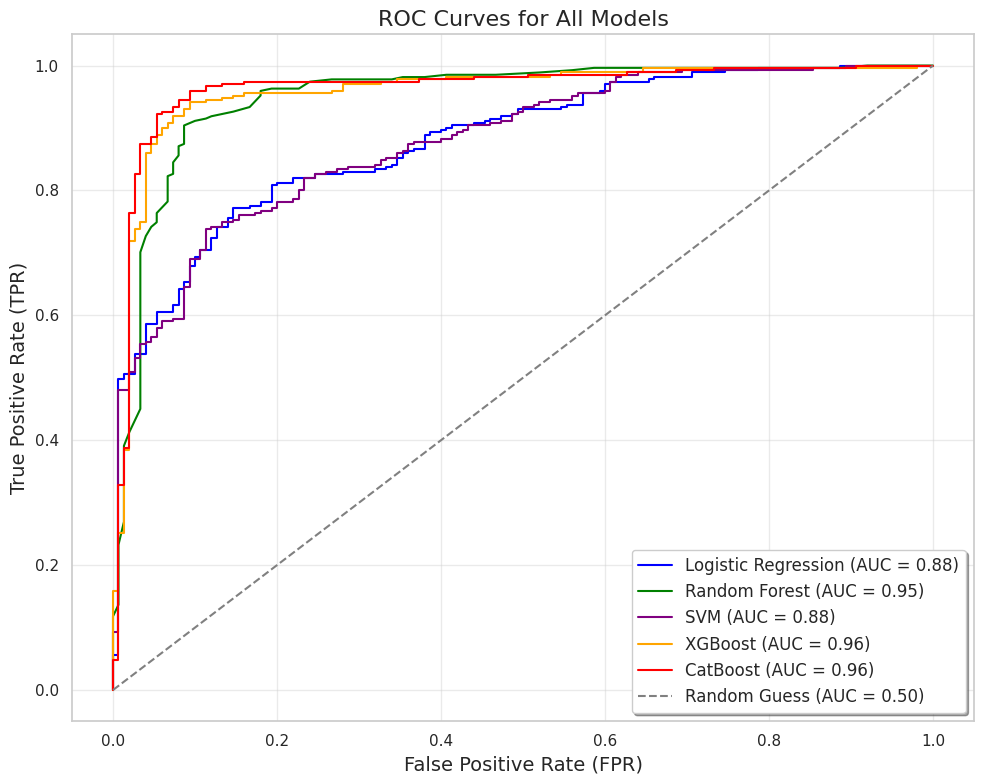

In [45]:
# ROC Curve Plotting
plt.figure(figsize=(10, 8))

# Logistic Regression
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, y_proba_log_reg)
plt.plot(fpr_log_reg, tpr_log_reg, label=f"Logistic Regression (AUC = {roc_auc_log_reg:.2f})", color="blue")

# Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_random_forest)
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_random_forest:.2f})", color="green")

# SVM
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_proba_svm)
plt.plot(fpr_svm, tpr_svm, label=f"SVM (AUC = {roc_auc_svm:.2f})", color="purple")

# XGBoost
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_proba_xgboost)
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC = {roc_auc_xgboost:.2f})", color="orange")

# CatBoost
fpr_cat, tpr_cat, _ = roc_curve(y_test, y_proba_catboost)
plt.plot(fpr_cat, tpr_cat, label=f"CatBoost (AUC = {roc_auc_catboost:.2f})", color="red")

# Diagonal line for random guessing
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess (AUC = 0.50)", color="gray")

# Plot details
plt.title("ROC Curves for All Models", fontsize=16)
plt.xlabel("False Positive Rate (FPR)", fontsize=14)
plt.ylabel("True Positive Rate (TPR)", fontsize=14)
plt.grid(alpha=0.4)
plt.legend(loc="lower right", fontsize=12, fancybox=True, shadow=True)
plt.tight_layout()
plt.show()

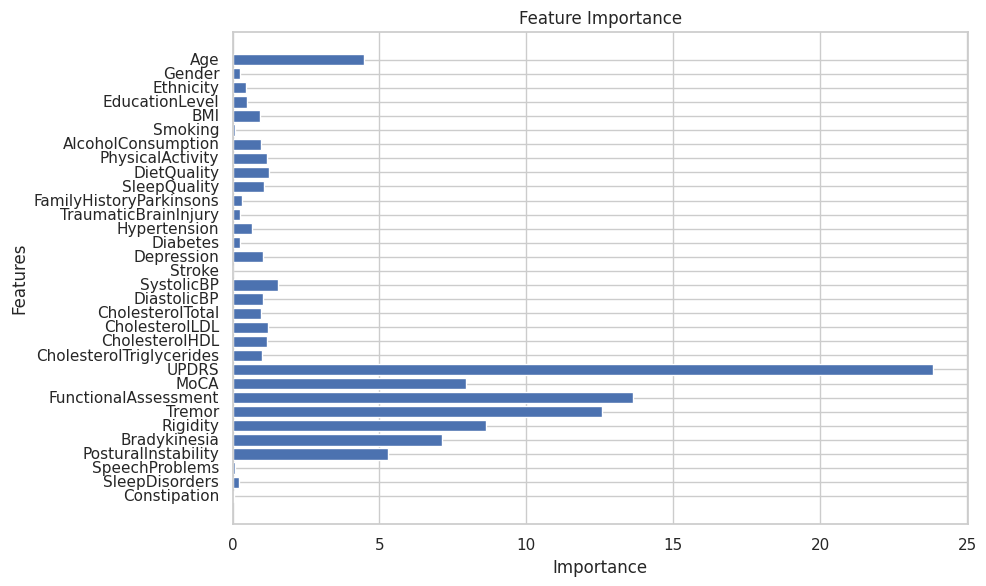

In [46]:
model = CatBoostClassifier(verbose=0)
model.fit(X_train, y_train)

# Feature importance
importances = model.feature_importances_

# Creating a DataFrame for feature importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Visualizing feature importance with adjusted spacing
plt.figure(figsize=(10, 6))

plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.gca().invert_yaxis()

# Adjusting spacing between Y-axis titles
plt.yticks(rotation=0, ha='right', va='center')
plt.tight_layout(pad=1.0)  # Increase pad value to increase spacing
plt.show()


# Double fusion

In [51]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
)
import pandas as pd

# Get predicted probabilities for models that support it
y_proba_random_forest = random_forest.predict_proba(X_test)[:, 1]
y_proba_svm = svm.decision_function(X_test)  # SVM gives decision scores
y_proba_xgboost = xgboost.predict_proba(X_test)[:, 1]
y_proba_catboost = catboost.predict_proba(X_test)[:, 1]

# Normalize SVM decision scores to probabilities
y_proba_svm = (y_proba_svm - y_proba_svm.min()) / (y_proba_svm.max() - y_proba_svm.min())

# Fusion Model 1: Random Forest + SVM (Weighted Average)
fusion_1_weights = [0.5, 0.5]  # Assign equal weights to both models
y_proba_fusion_1 = (
    fusion_1_weights[0] * y_proba_random_forest + fusion_1_weights[1] * y_proba_svm
)

# Fusion Model 2: XGBoost + CatBoost (Weighted Average)
fusion_2_weights = [0.5, 0.5]  # Assign equal weights to both models
y_proba_fusion_2 = (
    fusion_2_weights[0] * y_proba_xgboost + fusion_2_weights[1] * y_proba_catboost
)

# Fusion Model 3: Combine Fusion Model 1 and Fusion Model 2 (Weighted Average)
fusion_3_weights = [0.5, 0.5]  # Assign equal weights to both fusion models
y_proba_fusion_3 = (
    fusion_3_weights[0] * y_proba_fusion_1 + fusion_3_weights[1] * y_proba_fusion_2
)

# Fusion Model 4: Random Forest + XGBoost + CatBoost (Weighted Average)
fusion_4_weights = [0.33, 0.33, 0.34]  # Assign weights to the models
y_proba_fusion_4 = (
    fusion_4_weights[0] * y_proba_random_forest
    + fusion_4_weights[1] * y_proba_xgboost
    + fusion_4_weights[2] * y_proba_catboost
)

# Convert probabilities to predictions using a threshold of 0.5
y_pred_fusion_1 = (y_proba_fusion_1 >= 0.5).astype(int)
y_pred_fusion_2 = (y_proba_fusion_2 >= 0.5).astype(int)
y_pred_fusion_3 = (y_proba_fusion_3 >= 0.5).astype(int)
y_pred_fusion_4 = (y_proba_fusion_4 >= 0.5).astype(int)

# Evaluate Fusion Model 1
accuracy_fusion_1 = accuracy_score(y_test, y_pred_fusion_1)
precision_fusion_1 = precision_score(y_test, y_pred_fusion_1)
recall_fusion_1 = recall_score(y_test, y_pred_fusion_1)
f1_fusion_1 = f1_score(y_test, y_pred_fusion_1)
roc_auc_fusion_1 = roc_auc_score(y_test, y_proba_fusion_1)

# Evaluate Fusion Model 2
accuracy_fusion_2 = accuracy_score(y_test, y_pred_fusion_2)
precision_fusion_2 = precision_score(y_test, y_pred_fusion_2)
recall_fusion_2 = recall_score(y_test, y_pred_fusion_2)
f1_fusion_2 = f1_score(y_test, y_pred_fusion_2)
roc_auc_fusion_2 = roc_auc_score(y_test, y_proba_fusion_2)

# Evaluate Fusion Model 3
accuracy_fusion_3 = accuracy_score(y_test, y_pred_fusion_3)
precision_fusion_3 = precision_score(y_test, y_pred_fusion_3)
recall_fusion_3 = recall_score(y_test, y_pred_fusion_3)
f1_fusion_3 = f1_score(y_test, y_pred_fusion_3)
roc_auc_fusion_3 = roc_auc_score(y_test, y_proba_fusion_3)

# Evaluate Fusion Model 4
accuracy_fusion_4 = accuracy_score(y_test, y_pred_fusion_4)
precision_fusion_4 = precision_score(y_test, y_pred_fusion_4)
recall_fusion_4 = recall_score(y_test, y_pred_fusion_4)
f1_fusion_4 = f1_score(y_test, y_pred_fusion_4)
roc_auc_fusion_4 = roc_auc_score(y_test, y_proba_fusion_4)

# Display performance
fusion_performance = {
    "Fusion Model": [
        "Fusion 1 (RF+SVM)",
        "Fusion 2 (XGB+CatBoost)",
        "Fusion 3 (F1+F2)",
        "Fusion 4 (RF+XGB+CatBoost)",
    ],
    "Accuracy": [
        accuracy_fusion_1,
        accuracy_fusion_2,
        accuracy_fusion_3,
        accuracy_fusion_4,
    ],
    "Precision": [
        precision_fusion_1,
        precision_fusion_2,
        precision_fusion_3,
        precision_fusion_4,
    ],
    "Recall": [
        recall_fusion_1,
        recall_fusion_2,
        recall_fusion_3,
        recall_fusion_4,
    ],
    "F1 Score": [
        f1_fusion_1,
        f1_fusion_2,
        f1_fusion_3,
        f1_fusion_4,
    ],
    "ROC AUC": [
        roc_auc_fusion_1,
        roc_auc_fusion_2,
        roc_auc_fusion_3,
        roc_auc_fusion_4,
    ],
}

fusion_performance_df = pd.DataFrame(fusion_performance)
print(fusion_performance_df)


                 Fusion Model  Accuracy  Precision    Recall  F1 Score  \
0           Fusion 1 (RF+SVM)  0.900238   0.942085  0.900369  0.920755   
1     Fusion 2 (XGB+CatBoost)  0.938242   0.962264  0.940959  0.951493   
2            Fusion 3 (F1+F2)  0.940618   0.962406  0.944649  0.953445   
3  Fusion 4 (RF+XGB+CatBoost)  0.938242   0.958801  0.944649  0.951673   

    ROC AUC  
0  0.954686  
1  0.961107  
2  0.961747  
3  0.960787  


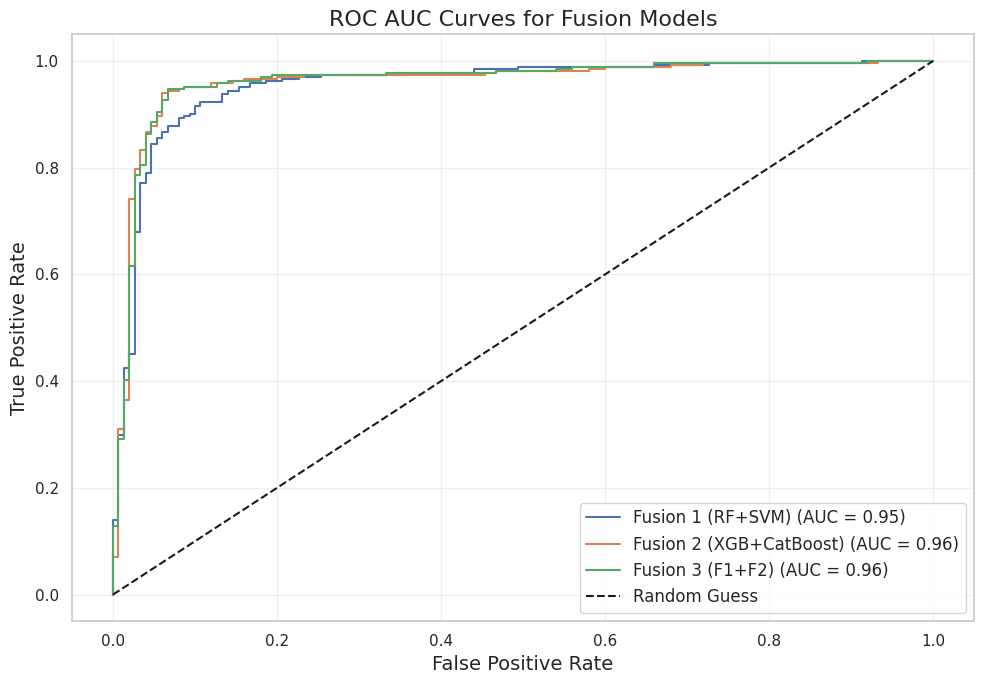

In [65]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Compute ROC curves for each fusion model
fpr_fusion_1, tpr_fusion_1, _ = roc_curve(y_test, y_proba_fusion_1)
fpr_fusion_2, tpr_fusion_2, _ = roc_curve(y_test, y_proba_fusion_2)
fpr_fusion_3, tpr_fusion_3, _ = roc_curve(y_test, y_proba_fusion_3)
fpr_fusion_4, tpr_fusion_4, _ = roc_curve(y_test, y_proba_fusion_4)

# Plot the ROC curves
plt.figure(figsize=(10, 7))

plt.plot(fpr_fusion_1, tpr_fusion_1, label=f"Fusion 1 (RF+SVM) (AUC = {roc_auc_fusion_1:.2f})")
plt.plot(fpr_fusion_2, tpr_fusion_2, label=f"Fusion 2 (XGB+CatBoost) (AUC = {roc_auc_fusion_2:.2f})")
plt.plot(fpr_fusion_3, tpr_fusion_3, label=f"Fusion 3 (F1+F2) (AUC = {roc_auc_fusion_3:.2f})")

# Add diagonal line for reference
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")

# Customize the plot
plt.title("ROC AUC Curves for Fusion Models", fontsize=16)
plt.xlabel("False Positive Rate", fontsize=14)
plt.ylabel("True Positive Rate", fontsize=14)
plt.legend(loc="lower right", fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()

# Show the plot
plt.show()


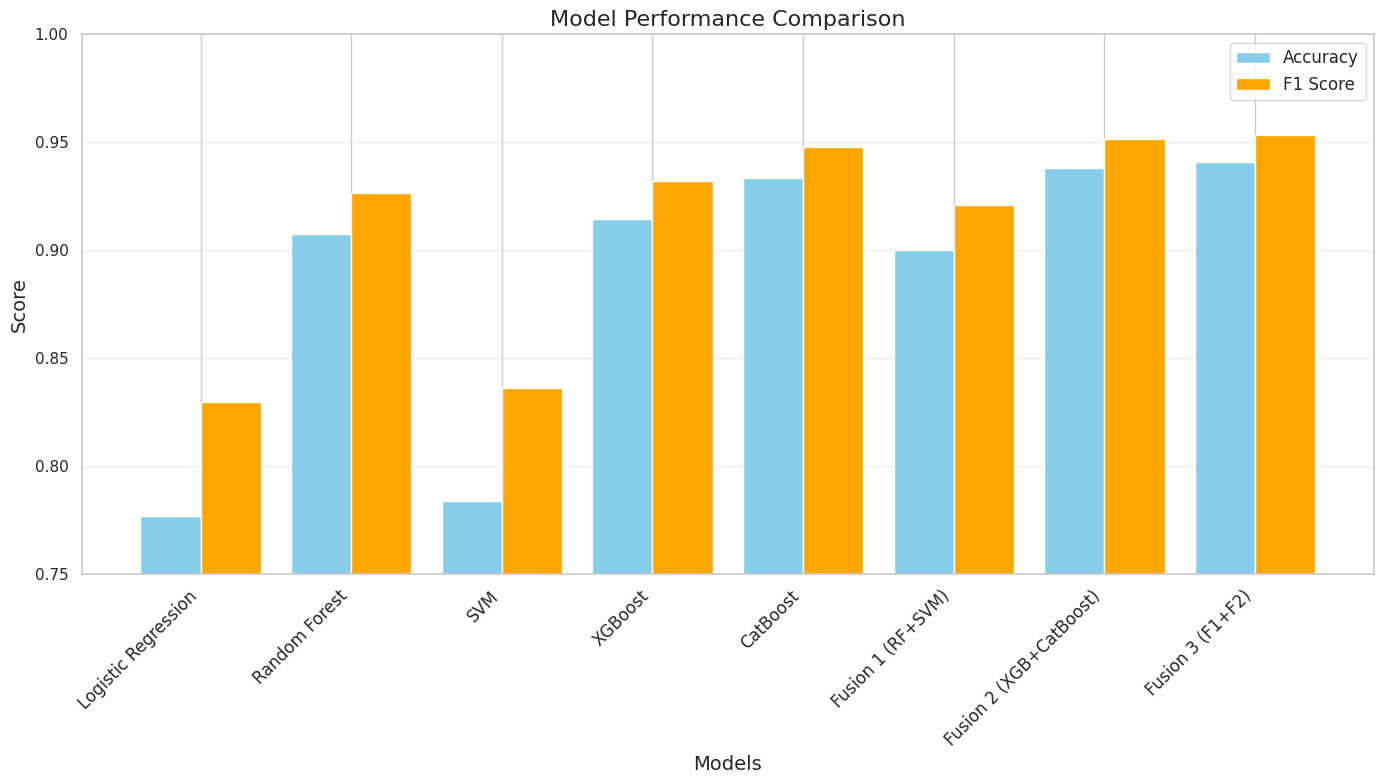

In [60]:
import matplotlib.pyplot as plt
import numpy as np

# Data for comparison
models = [
    'Logistic Regression', 
    'Random Forest', 
    'SVM', 
    'XGBoost', 
    'CatBoost', 
    'Fusion 1 (RF+SVM)', 
    'Fusion 2 (XGB+CatBoost)', 
    'Fusion 3 (F1+F2)'
]

# Updated performance metrics
accuracy = [0.776722, 0.907363, 0.783848, 0.914489, 0.933492, 0.900238, 0.938242, 0.940618]
f1_scores = [0.829710, 0.926276, 0.836036, 0.931818, 0.947955, 0.920755, 0.951493, 0.953445]

# Plot settings
x = np.arange(len(models))  # Model positions
width = 0.4  # Width of bars

plt.figure(figsize=(14, 8))
plt.bar(x - width/2, accuracy, width, label='Accuracy', color='skyblue')
plt.bar(x + width/2, f1_scores, width, label='F1 Score', color='orange')

# Customizing the plot
plt.title('Model Performance Comparison', fontsize=16)
plt.ylabel('Score', fontsize=14)
plt.xlabel('Models', fontsize=14)
plt.xticks(x, models, rotation=45, ha='right', fontsize=12)
plt.ylim(0.75, 1.0)  # Adjusted y-axis for better focus on differences
plt.legend(fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()

# Show the plot
plt.show()


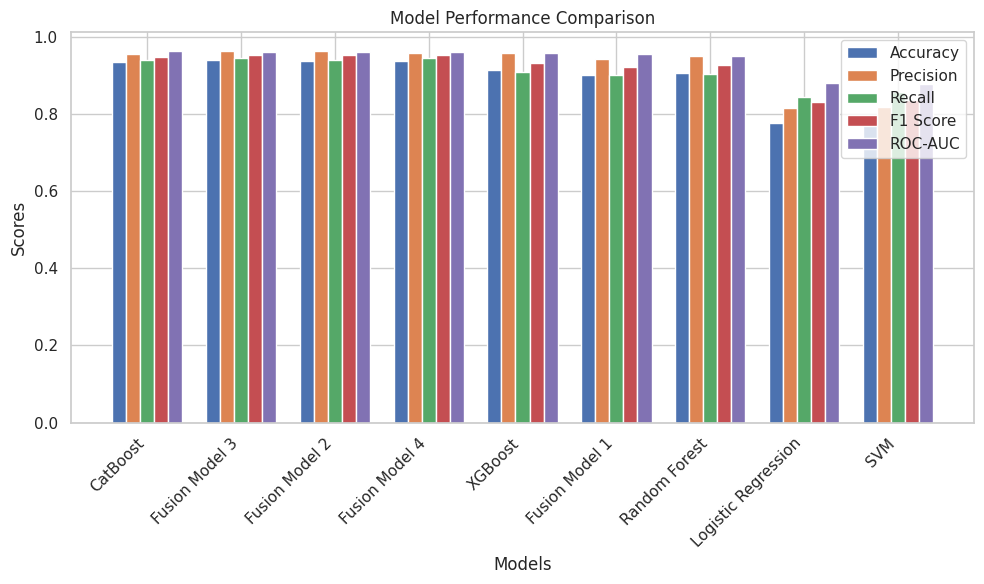

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Creating a dataframe from the data
data = {
    'Model': ['CatBoost', 'Fusion Model 3', 'Fusion Model 2', 'Fusion Model 4', 'XGBoost', 
              'Fusion Model 1', 'Random Forest', 'Logistic Regression', 'SVM'],
    'Accuracy': [0.933492, 0.940618, 0.938242, 0.938242, 0.914489, 0.900238, 0.907363, 0.776722, 0.783848],
    'Precision': [0.955056, 0.962406, 0.962264, 0.958801, 0.957198, 0.942085, 0.949612, 0.814947, 0.816901],
    'Recall': [0.940959, 0.944649, 0.940959, 0.944649, 0.907749, 0.900369, 0.904059, 0.845018, 0.856089],
    'F1 Score': [0.947955, 0.953445, 0.951493, 0.951673, 0.931818, 0.920755, 0.926276, 0.829710, 0.836036],
    'ROC-AUC': [0.963346, 0.961747, 0.961107, 0.960787, 0.957688, 0.954686, 0.950148, 0.879311, 0.878130]
}

# Convert data into DataFrame
df = pd.DataFrame(data)

# Set the plot style
sns.set(style="whitegrid")

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Set the width of each bar
bar_width = 0.15

# Define x positions for each metric group
x = range(len(df))

# Create grouped bar plots for each metric
ax.bar(x, df['Accuracy'], width=bar_width, label='Accuracy')
ax.bar([p + bar_width for p in x], df['Precision'], width=bar_width, label='Precision')
ax.bar([p + 2 * bar_width for p in x], df['Recall'], width=bar_width, label='Recall')
ax.bar([p + 3 * bar_width for p in x], df['F1 Score'], width=bar_width, label='F1 Score')
ax.bar([p + 4 * bar_width for p in x], df['ROC-AUC'], width=bar_width, label='ROC-AUC')

# Set labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks([p + 2 * bar_width for p in x])  # Adjust x-ticks to the middle of the bars
ax.set_xticklabels(df['Model'], rotation=45, ha='right')

# Add a legend
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()
